<a href="https://colab.research.google.com/github/z-arifin/SQL-Olist/blob/main/Project_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# import library untuk ignore future warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount("/content/gdrive")
con = sqlite3.connect("/content/gdrive/MyDrive/olist.db")

Mounted at /content/gdrive


In [2]:
# Membuat pemanggilan untuk tabel yang dibutuhkan
product = pd.read_sql("SELECT * FROM olist_products_dataset", con)
product.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
product_category = pd.read_sql("SELECT * FROM product_category_name_translation", con)
product_category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [4]:
review =  pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
review.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
seller =  pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
seller.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
order =  pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
order.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Membuat query
query = """
SELECT 
  price,
  freight_value,
  review_score,
  product_description_lenght,
  product_category_name_english
FROM (SELECT product_id, price, freight_value, review_score 
      FROM olist_order_items_dataset
      JOIN olist_order_reviews_dataset
      ON olist_order_items_dataset.order_id = olist_order_reviews_dataset.order_id) product_data
JOIN olist_products_dataset
ON product_data.product_id = olist_products_dataset.product_id
JOIN product_category_name_translation
ON  olist_products_dataset.product_category_name = product_category_name_translation.product_category_name
"""


data = pd.read_sql(query, con)
data.head()

,price,freight_value,review_score,product_description_lenght,product_category_name_english
0,58.90,13.29,5,598.0,cool_stuff
1,239.90,19.93,4,239.0,pet_shop
2,199.00,17.87,5,695.0,furniture_decor
3,12.99,12.79,4,480.0,perfumery
4,199.90,18.14,5,409.0,garden_tools


In [8]:
# Ekstrak ukuran data
nrows, ncols = data.shape

print(f"Data Input : ({nrows}, {ncols})")

Data Input : (110750, 5)


In [9]:
# Cek informasi umum dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   price                          110750 non-null  float64
 1   freight_value                  110750 non-null  float64
 2   review_score                   110750 non-null  int64  
 3   product_description_lenght     110750 non-null  float64
 4   product_category_name_english  110750 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ MB


In [10]:
# Mengecek Missing Value
data.isnull().sum()

price                            0
freight_value                    0
review_score                     0
product_description_lenght       0
product_category_name_english    0
dtype: int64

In [11]:
# Handling Missing Value
data.dropna(axis=0, inplace=True)
data

,price,freight_value,review_score,product_description_lenght,product_category_name_english
0,58.90,13.29,5,598.0,cool_stuff
1,239.90,19.93,4,239.0,pet_shop
2,199.00,17.87,5,695.0,furniture_decor
3,12.99,12.79,4,480.0,perfumery
4,199.90,18.14,5,409.0,garden_tools
...,...,...,...,...,...
110745,299.99,43.41,5,1002.0,housewares
110746,350.00,36.53,5,232.0,computers_accessories
110747,99.90,16.95,5,869.0,sports_leisure
110748,55.99,8.72,5,1306.0,computers_accessories


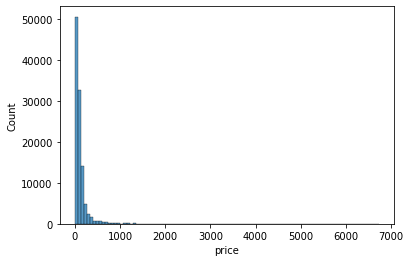

In [12]:
# Mengecek outlier dengan histogram
sns.histplot(data=data,x="price", bins=100)

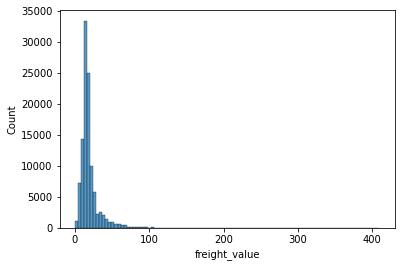

In [13]:
sns.histplot(data=data,x="freight_value", bins=100)

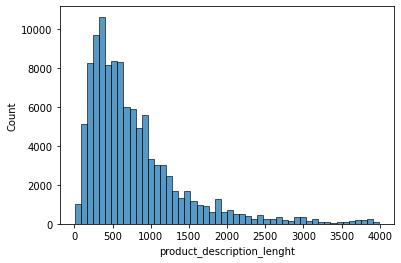

In [14]:
sns.histplot(data=data,x="product_description_lenght", bins=50)

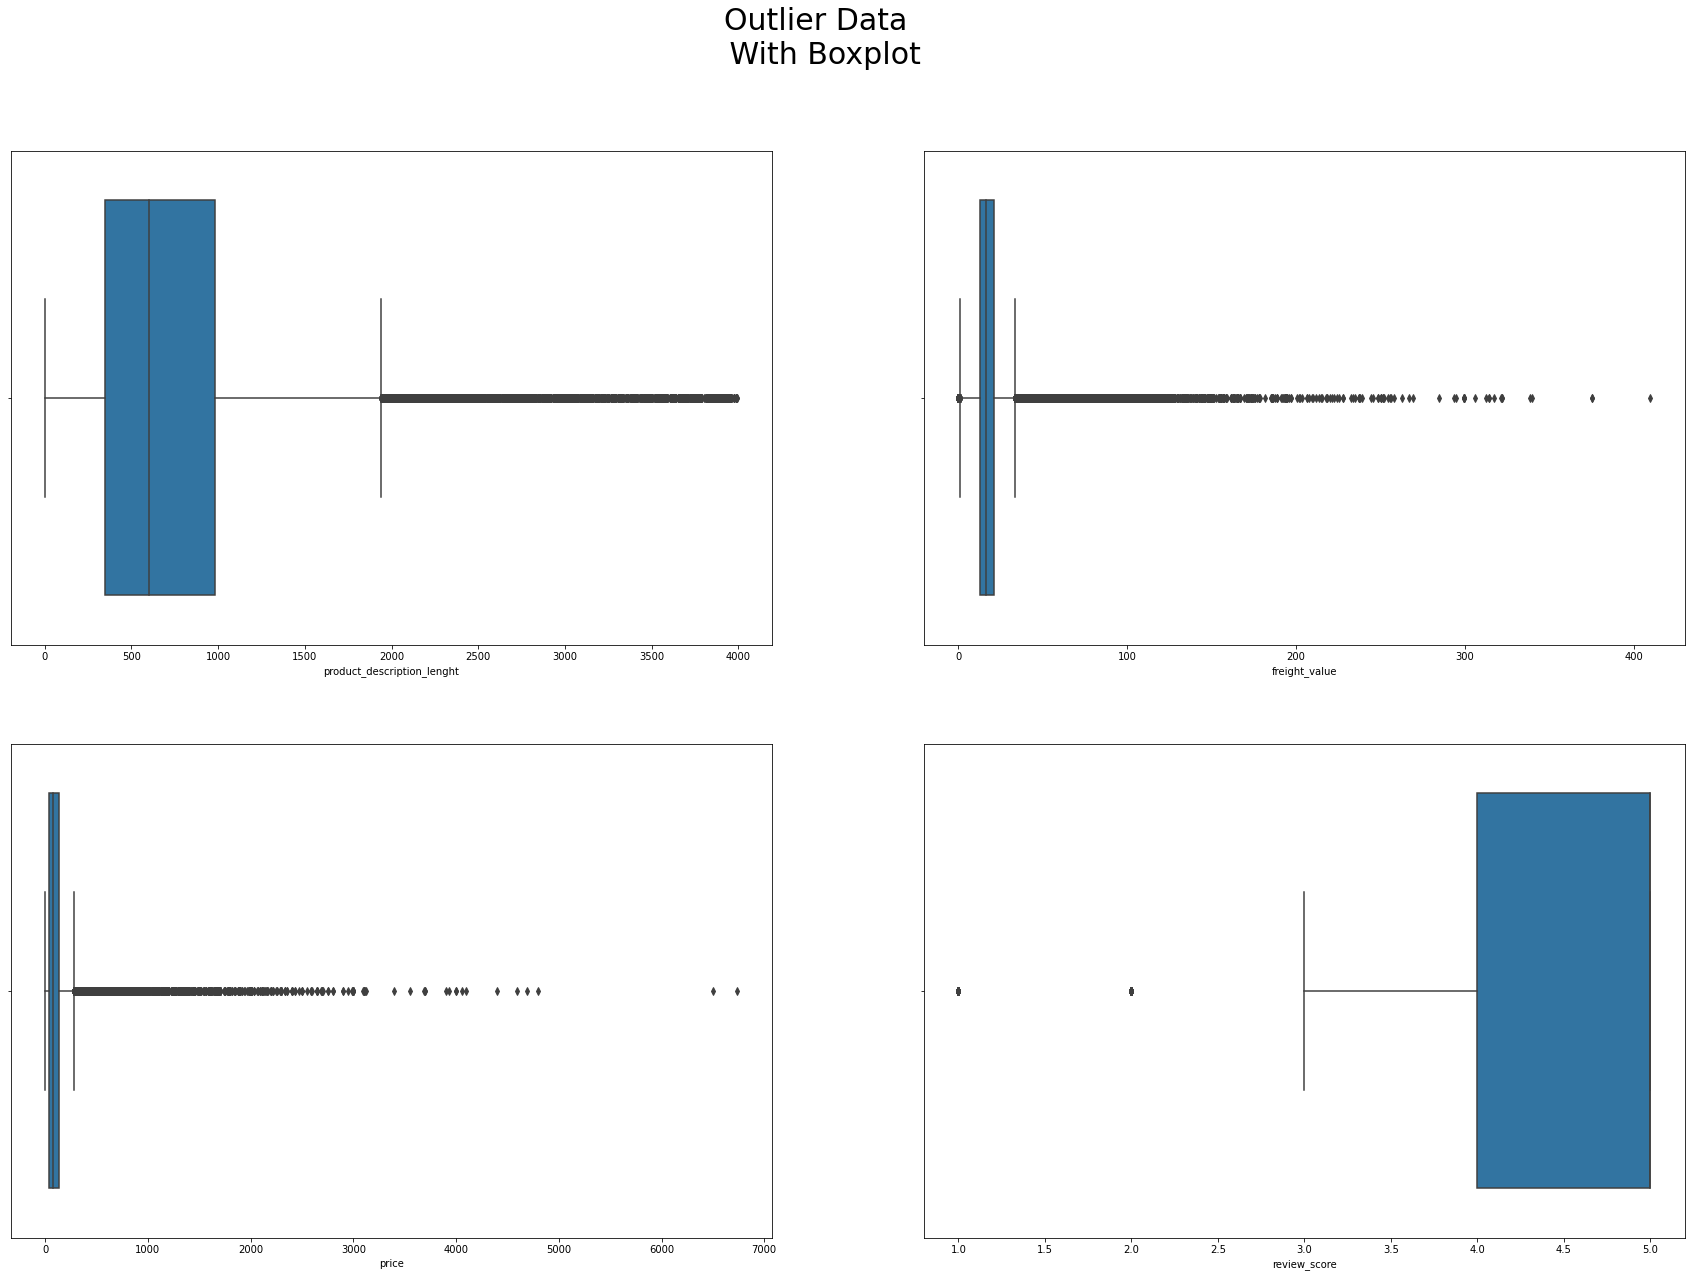

In [15]:
# Mengecek Outlier dengan boxplot

fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Outlier Data \n With Boxplot', fontsize =30)

sns.boxplot(ax=axes[0, 0], data=data, x='product_description_lenght')
sns.boxplot(ax=axes[0, 1], data=data, x='freight_value')
sns.boxplot(ax=axes[1, 0], data=data, x='price')
sns.boxplot(ax=axes[1, 1], data=data, x='review_score')

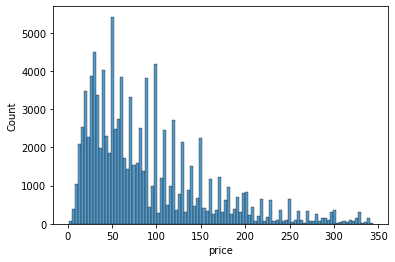

In [16]:
# Handling Outlier
# batas atas data
batas_atas = data["price"].quantile(q=0.9) * 1.5

# plot tanpa outlier
data_without_outlier = data[data["price"] < batas_atas]

# plot kolom SQ_FT tanpa extreme outlier
sns.histplot(data_without_outlier["price"]);

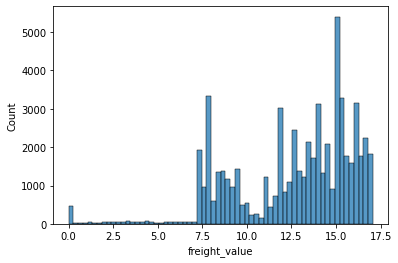

In [17]:
# Handling Outlier
# batas atas data
batas_atas = data["freight_value"].quantile(q=0.9) * 0.5

# plot tanpa outlier
data_without_outlier = data[data["freight_value"] < batas_atas]

# plot kolom SQ_FT tanpa extreme outlier
sns.histplot(data_without_outlier["freight_value"]);

In [18]:
# Mengecek data duplikat
data_without_outlier[data_without_outlier.duplicated(keep=False)]

,price,freight_value,review_score,product_description_lenght,product_category_name_english
0,58.90,13.29,5,598.0,cool_stuff
3,12.99,12.79,4,480.0,perfumery
10,59.99,8.88,5,614.0,health_beauty
13,49.90,13.37,5,366.0,garden_tools
14,49.90,13.37,5,366.0,garden_tools
...,...,...,...,...,...
110728,66.39,14.05,5,869.0,food
110731,199.00,16.83,5,965.0,telephony
110736,89.90,11.83,5,701.0,furniture_decor
110747,99.90,16.95,5,869.0,sports_leisure


In [19]:
# Handling data duplikat
clean_data = data_without_outlier.drop_duplicates(keep='first')
clean_data


,price,freight_value,review_score,product_description_lenght,product_category_name_english
0,58.90,13.29,5,598.0,cool_stuff
3,12.99,12.79,4,480.0,perfumery
5,21.90,12.69,4,558.0,housewares
6,19.90,11.85,4,815.0,telephony
8,145.95,11.65,1,493.0,health_beauty
...,...,...,...,...,...
110723,129.99,12.11,1,897.0,cool_stuff
110724,69.95,7.75,2,1209.0,health_beauty
110733,24.99,15.28,4,777.0,telephony
110738,4.90,10.96,1,103.0,musical_instruments


In [20]:
# Mengecek kembali tipe data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42949 entries, 0 to 110749
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          42949 non-null  float64
 1   freight_value                  42949 non-null  float64
 2   review_score                   42949 non-null  int64  
 3   product_description_lenght     42949 non-null  float64
 4   product_category_name_english  42949 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ MB


In [21]:
#top_products = clean_data.groupby(["product_category_name_english"])["review_score"].count().sort_values(ascending=False)
total_product = clean_data.groupby(["product_category_name_english"])["price"].count().sort_values(ascending=False)
sort_price = clean_data.groupby(["product_category_name_english"])["price"].sum().sort_values(ascending=False)
sort_value = clean_data.groupby(["product_category_name_english"])["freight_value"].sum().sort_values(ascending=False)
sort_score = clean_data.groupby(["product_category_name_english"])["review_score"].sum().sort_values(ascending=False)
sort_desc = clean_data.groupby(["product_category_name_english"])["product_description_lenght"].sum().sort_values(ascending=False)

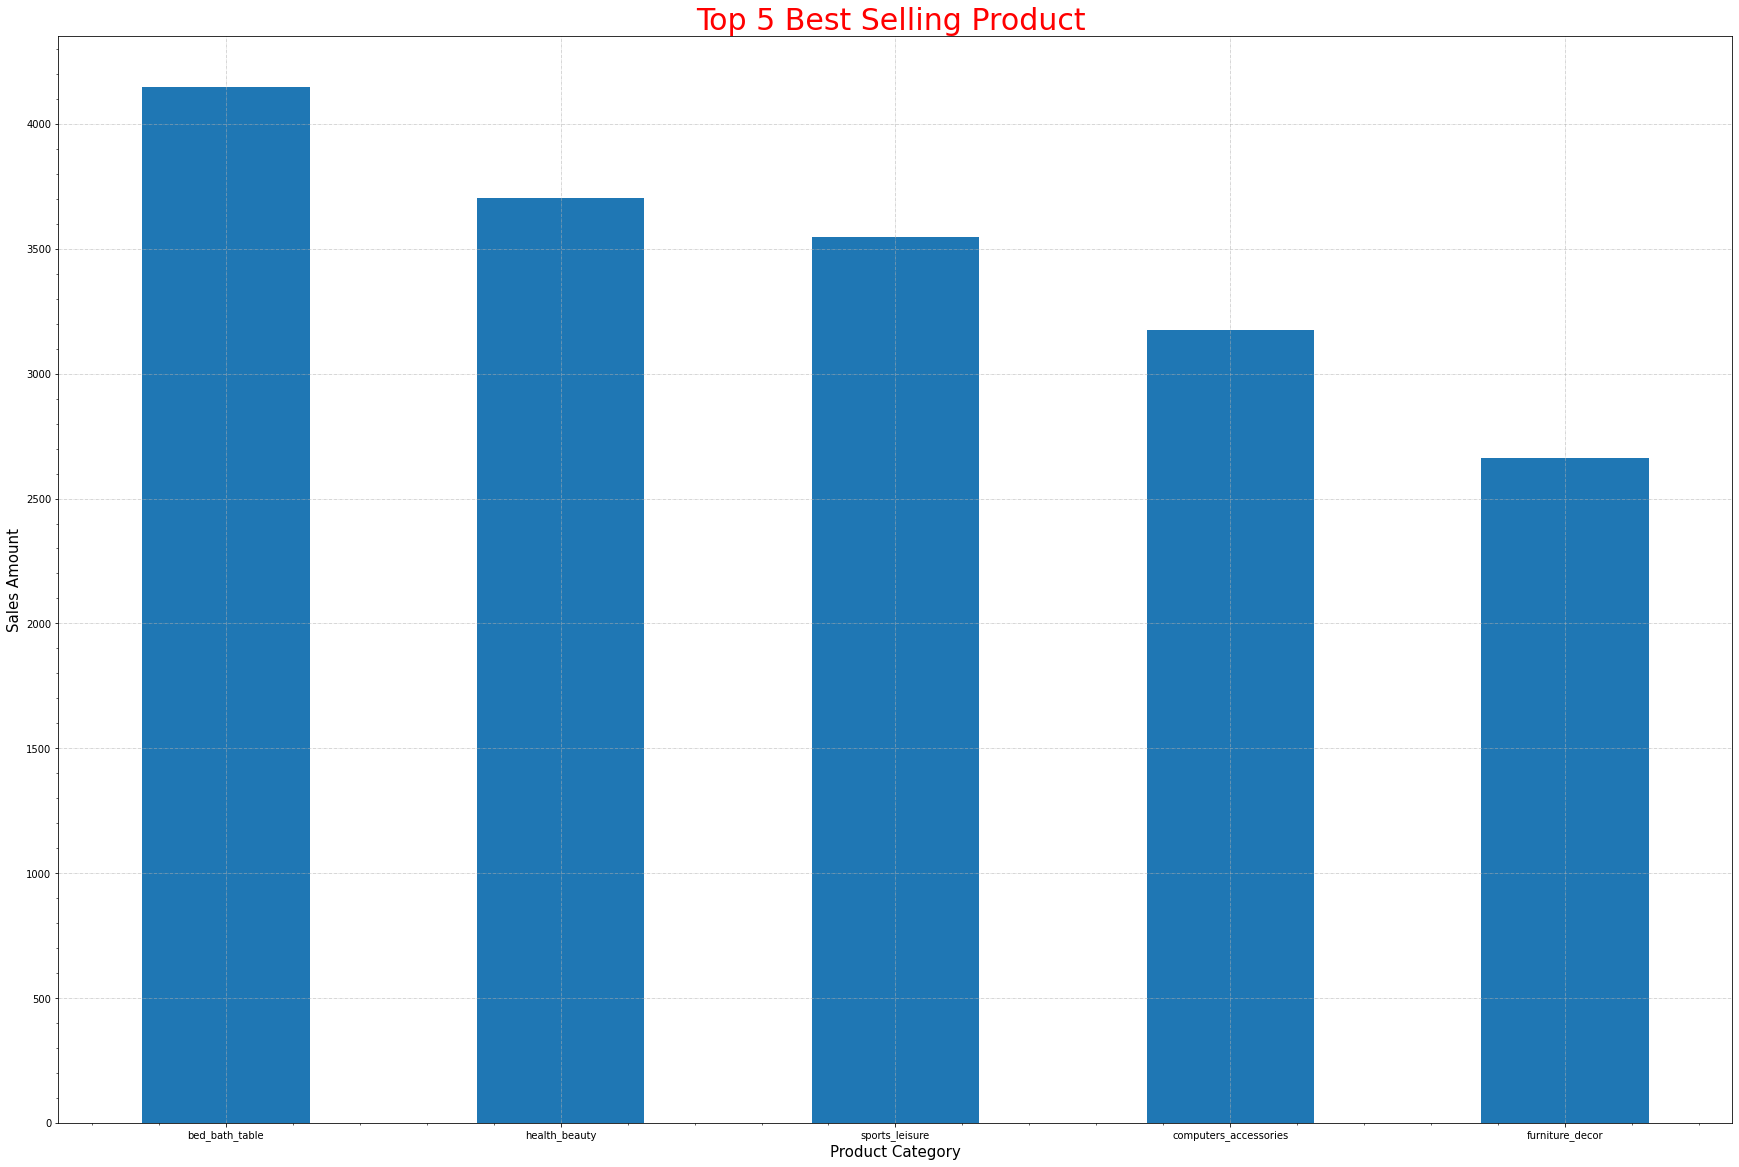

In [22]:
total_product.head().plot(kind="bar", figsize=(30, 20), rot= 0)
plt.title ("Top 5 Best Selling Product ", size = 30, c = 'r')
plt.ylabel('Sales Amount', size = 15)
plt.xlabel('Product Category',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [23]:
total_product

product_category_name_english
bed_bath_table                       4146
health_beauty                        3704
sports_leisure                       3546
computers_accessories                3173
furniture_decor                      2664
                                     ... 
cds_dvds_musicals                       6
furniture_mattress_and_upholstery       3
la_cuisine                              2
security_and_services                   1
computers                               1
Name: price, Length: 71, dtype: int64

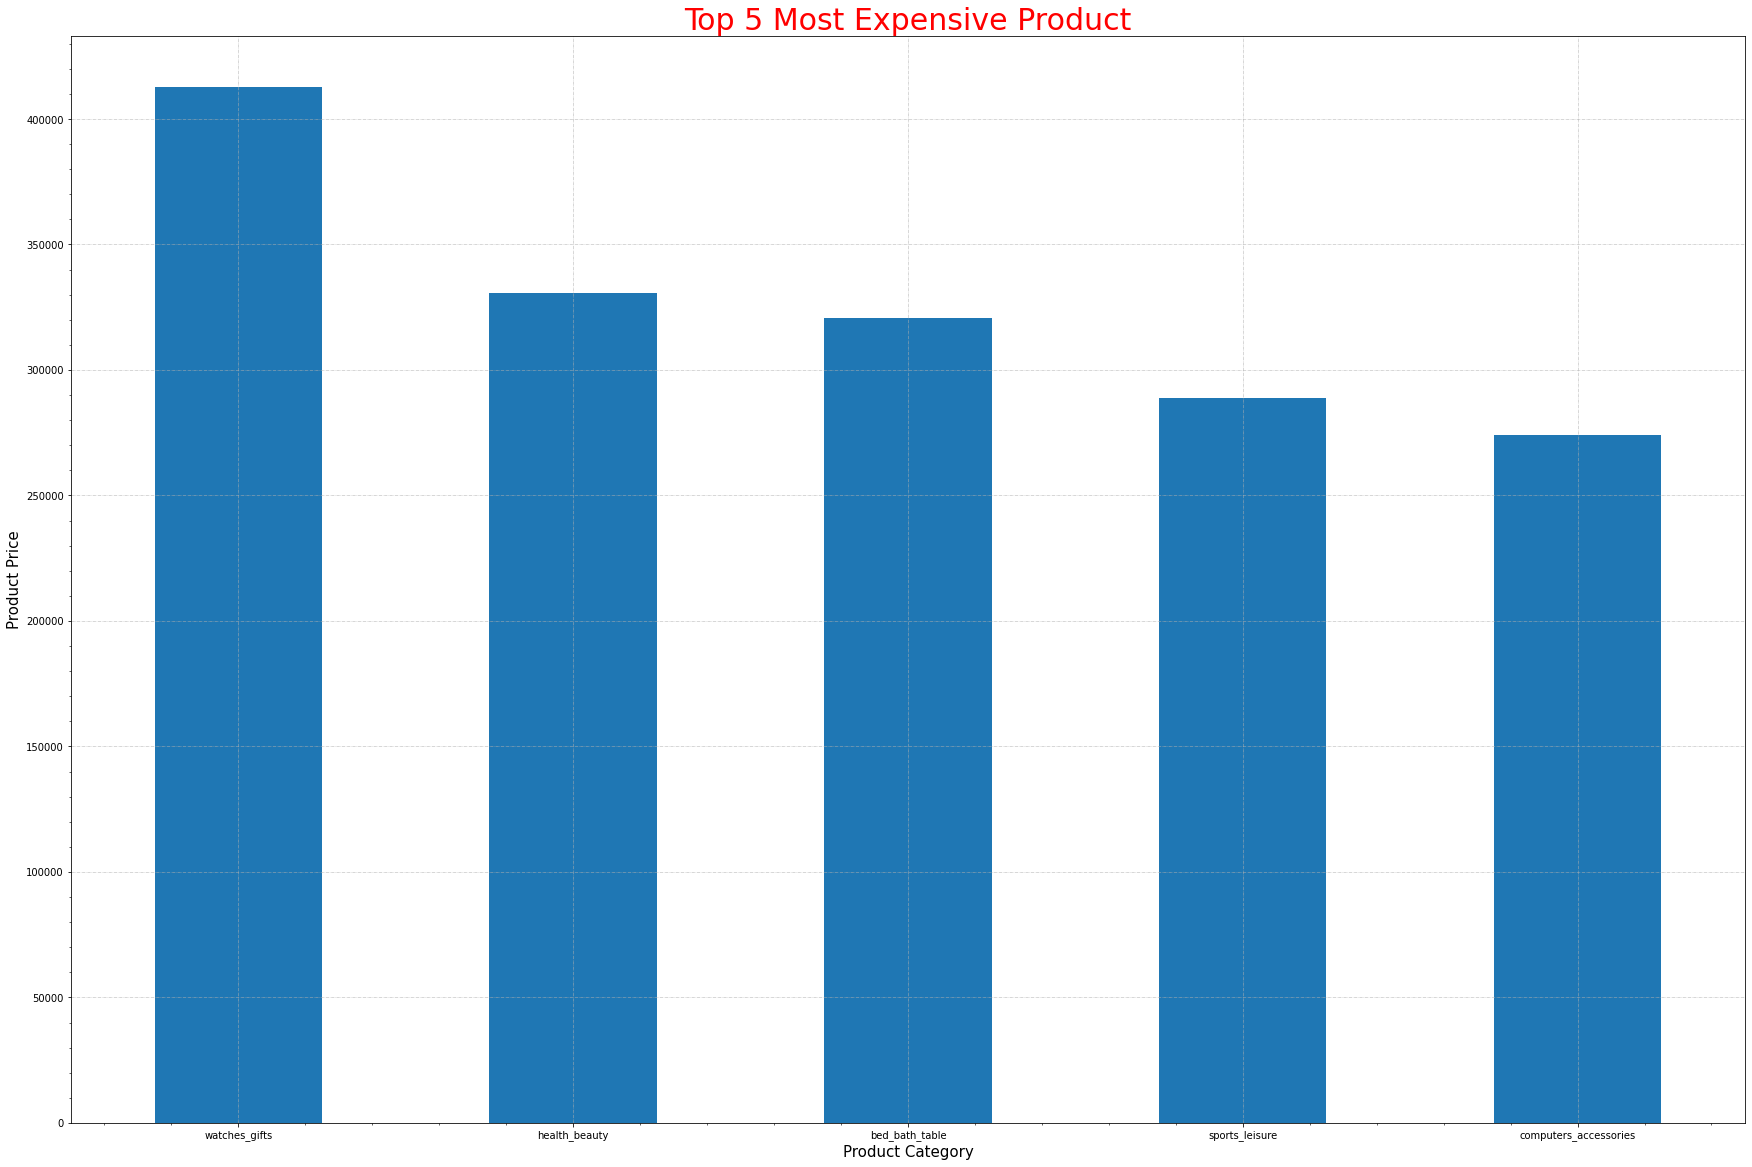

In [24]:
sort_price.head().plot(kind="bar", figsize=(30, 20), rot= 0)
plt.title ("Top 5 Most Expensive Product", size = 30, c = 'r')
plt.ylabel('Product Price', size = 15)
plt.xlabel('Product Category',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [25]:
sort_price

product_category_name_english
watches_gifts                        412565.71
health_beauty                        330680.44
bed_bath_table                       320732.48
sports_leisure                       288911.06
computers_accessories                274196.05
                                       ...    
furniture_mattress_and_upholstery       465.40
cds_dvds_musicals                       290.00
home_comfort_2                          262.59
la_cuisine                              129.00
security_and_services                   100.00
Name: price, Length: 71, dtype: float64

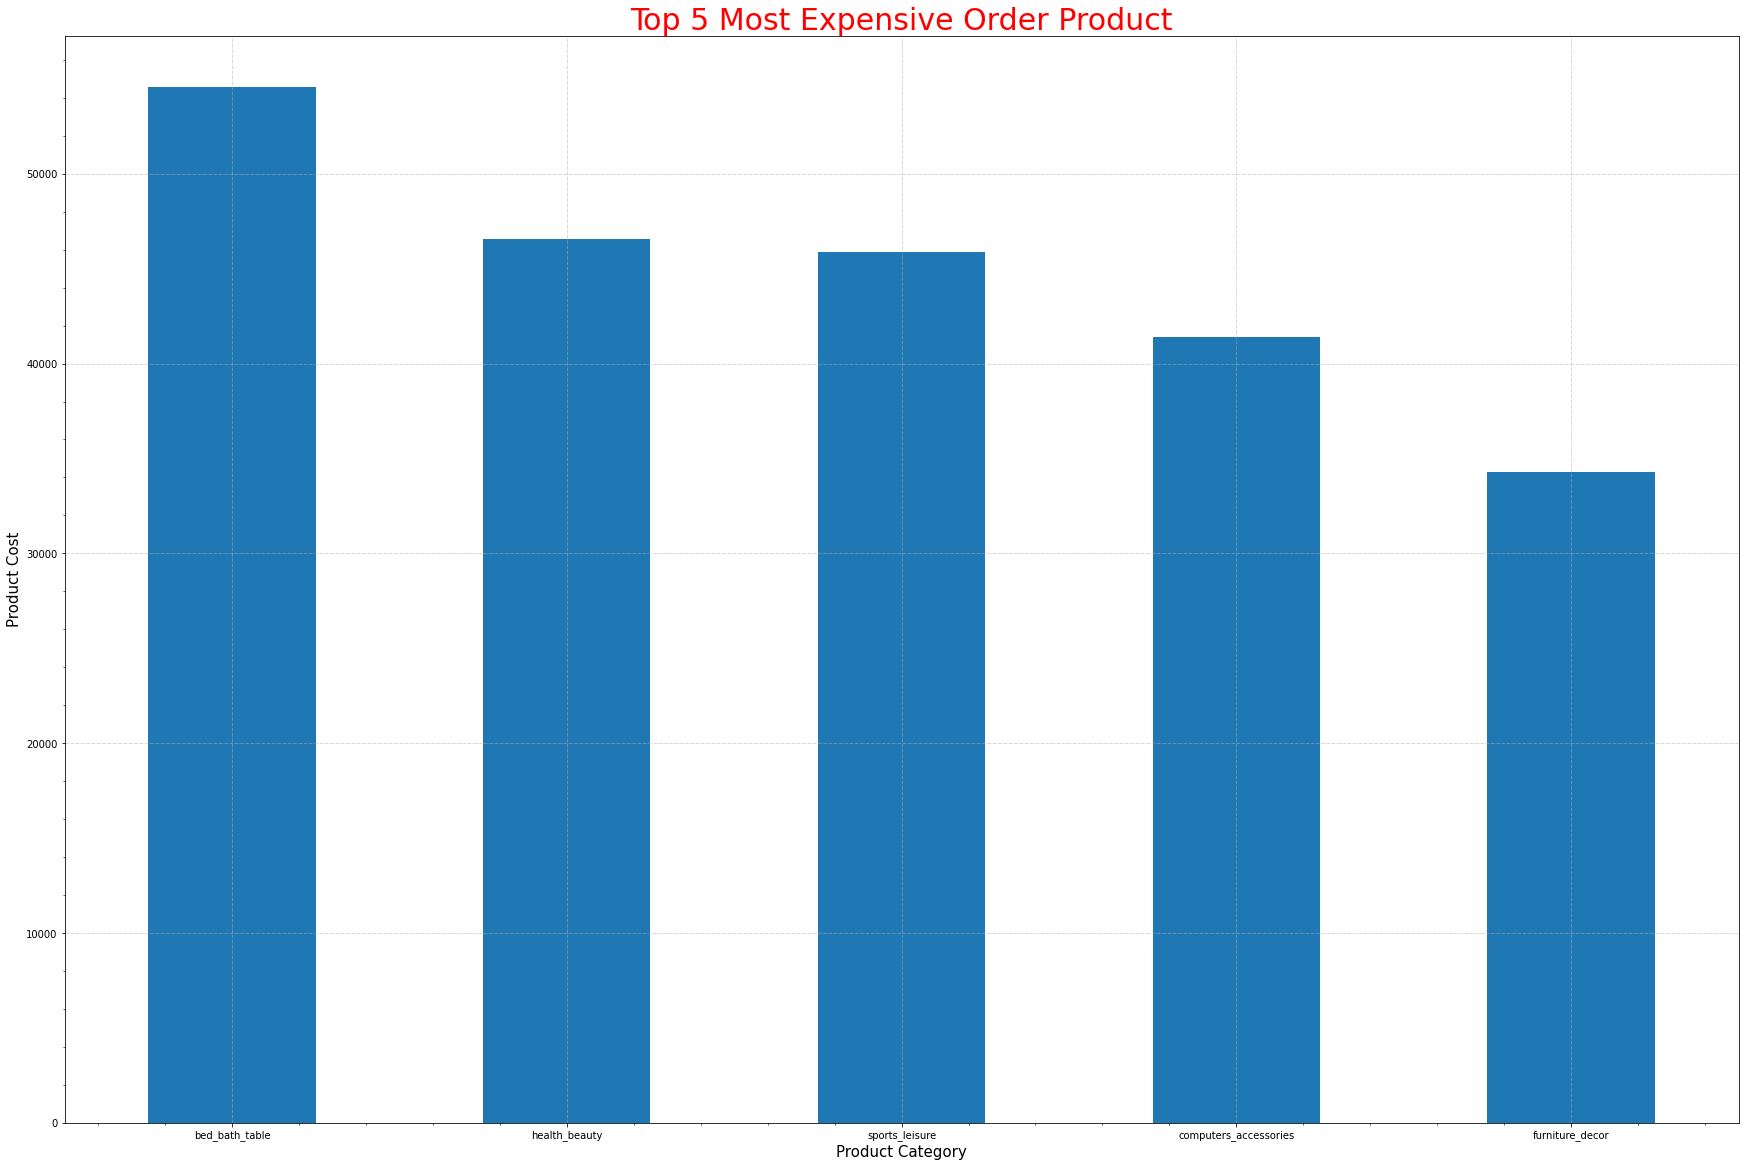

In [26]:
sort_value.head().plot(kind="bar", figsize=(30, 20), rot= 0)
plt.title ("Top 5 Most Expensive Order Product", size = 30, c = 'r')
plt.ylabel('Product Cost', size = 15)
plt.xlabel('Product Category',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [27]:
sort_value

product_category_name_english
bed_bath_table                       54543.56
health_beauty                        46565.49
sports_leisure                       45868.82
computers_accessories                41410.99
furniture_decor                      34313.20
                                       ...   
cds_dvds_musicals                       78.15
furniture_mattress_and_upholstery       38.12
la_cuisine                              25.41
security_and_services                   15.45
computers                               15.09
Name: freight_value, Length: 71, dtype: float64

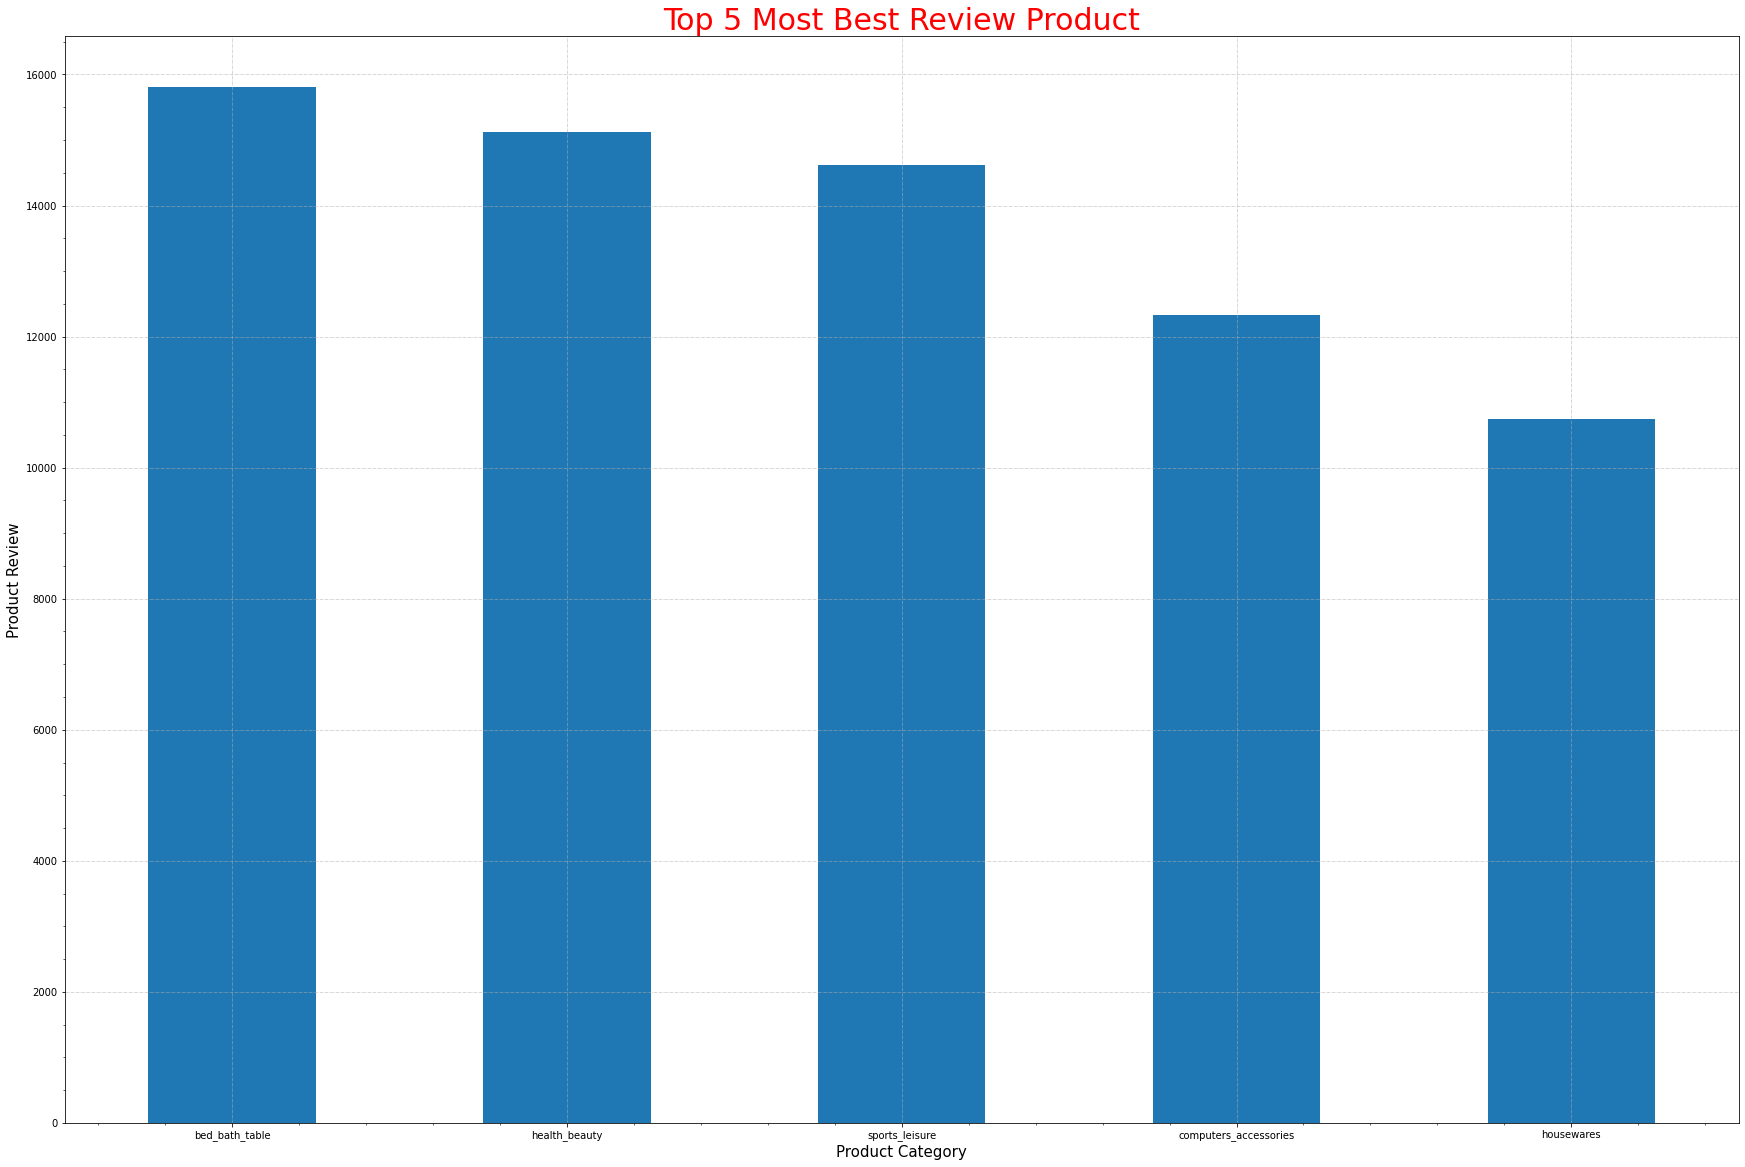

In [28]:
sort_score.head().plot(kind="bar", figsize=(30, 20), rot= 0)
plt.title ("Top 5 Most Best Review Product", size = 30, c = 'r')
plt.ylabel('Product Review', size = 15)
plt.xlabel('Product Category',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [29]:
sort_score

product_category_name_english
bed_bath_table                       15802
health_beauty                        15120
sports_leisure                       14615
computers_accessories                12323
housewares                           10745
                                     ...  
cds_dvds_musicals                       26
furniture_mattress_and_upholstery       12
la_cuisine                               6
security_and_services                    1
computers                                1
Name: review_score, Length: 71, dtype: int64

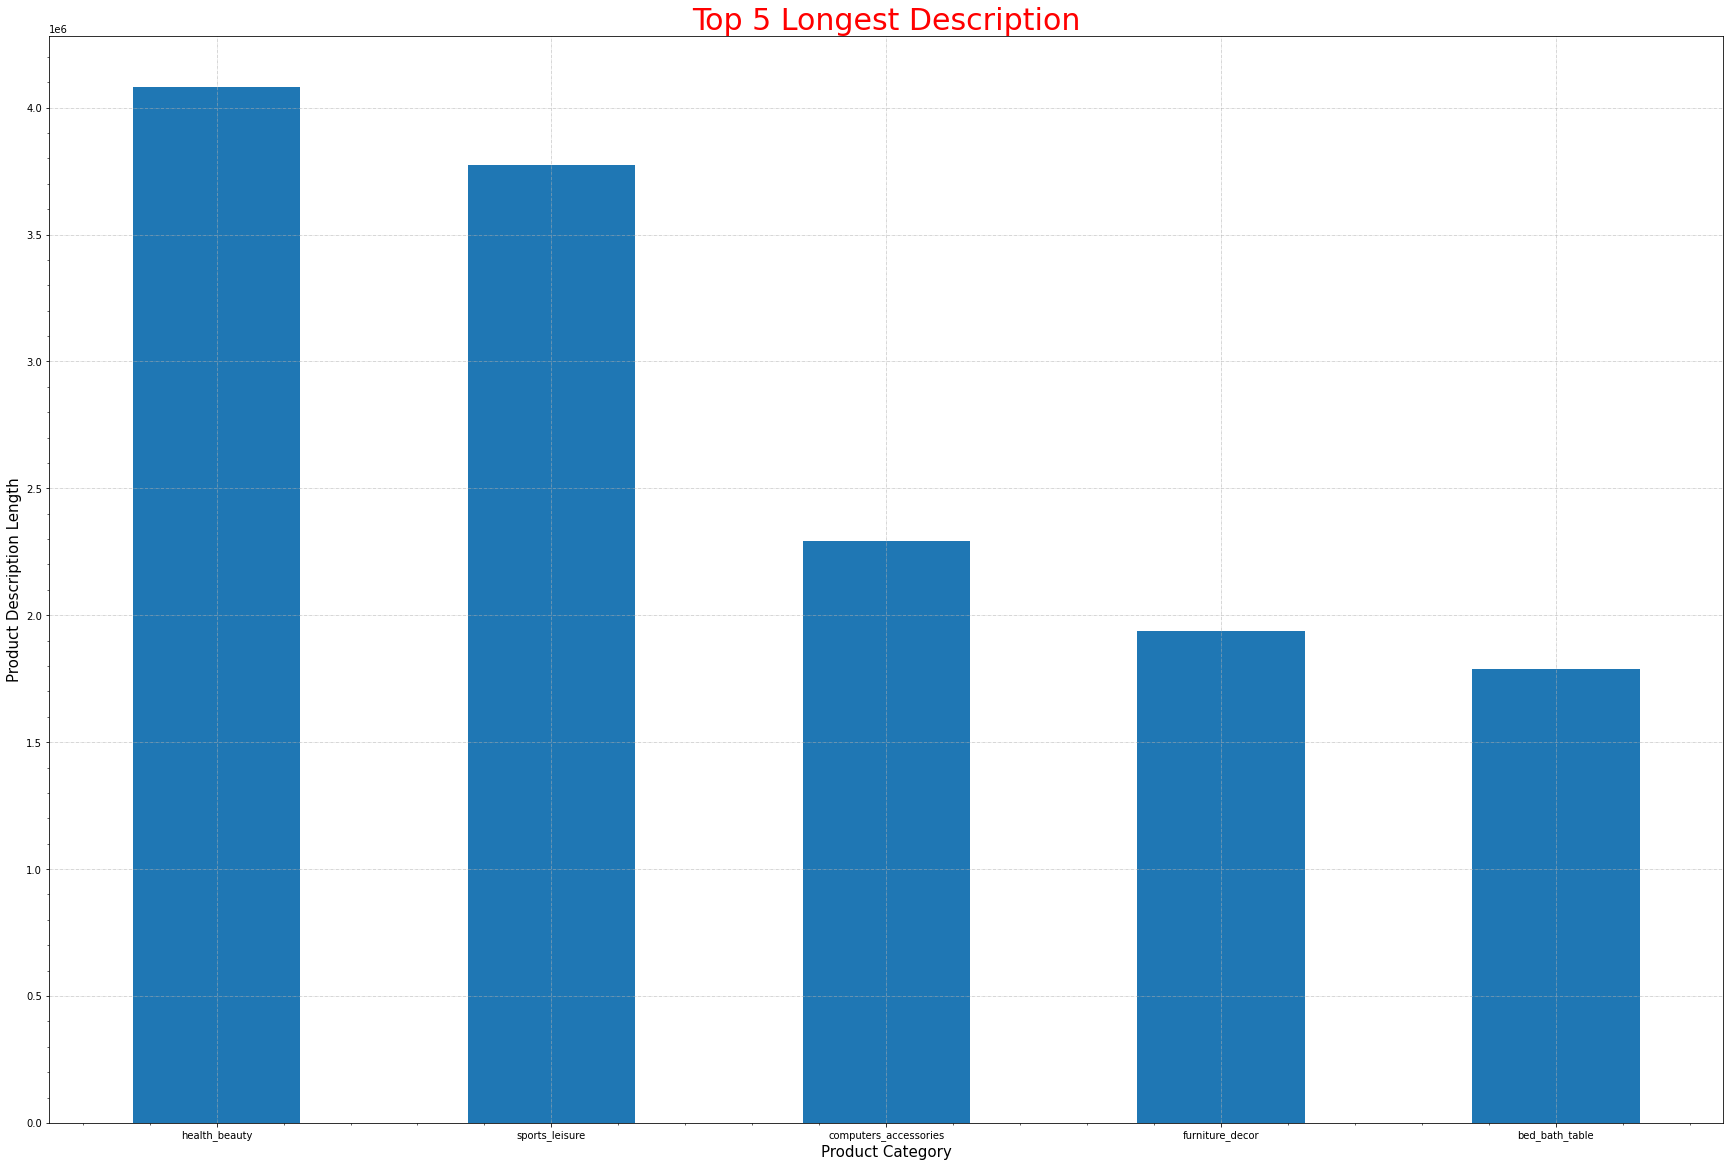

In [30]:
sort_desc.head().plot(kind="bar", figsize=(30, 20), rot= 0)
plt.title ("Top 5 Longest Description", size = 30, c = 'r')
plt.ylabel('Product Description Length', size = 15)
plt.xlabel('Product Category',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [31]:
sort_desc

product_category_name_english
health_beauty                4079393.0
sports_leisure               3773775.0
computers_accessories        2291328.0
furniture_decor              1937997.0
bed_bath_table               1789261.0
                               ...    
fashion_childrens_clothes       2417.0
computers                       1869.0
la_cuisine                       748.0
cds_dvds_musicals                702.0
security_and_services            461.0
Name: product_description_lenght, Length: 71, dtype: float64

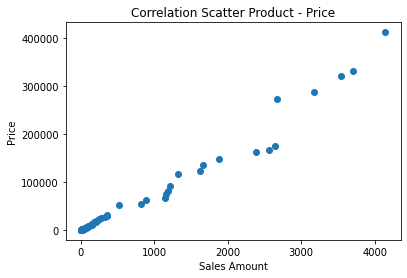

In [32]:
plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(total_product, sort_price)

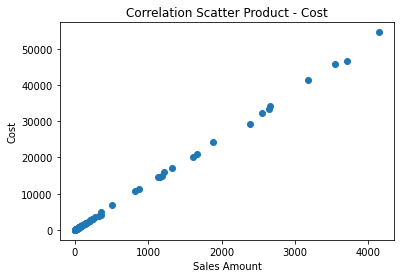

In [33]:
plt.xlabel("Sales Amount")
plt.ylabel("Cost")
plt.title("Correlation Scatter Product - Cost")
plt.scatter(total_product, sort_value)

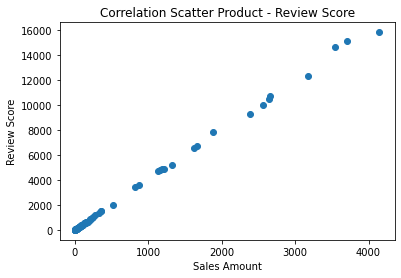

In [34]:
plt.xlabel("Sales Amount")
plt.ylabel("Review Score")
plt.title("Correlation Scatter Product - Review Score")
plt.scatter(total_product, sort_score)

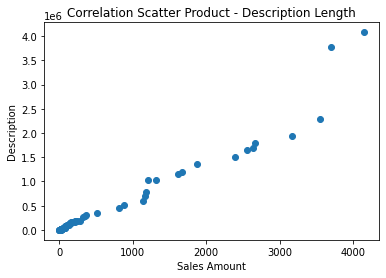

In [35]:
plt.xlabel("Sales Amount")
plt.ylabel("Description")
plt.title("Correlation Scatter Product - Description Length")
plt.scatter(total_product, sort_desc)

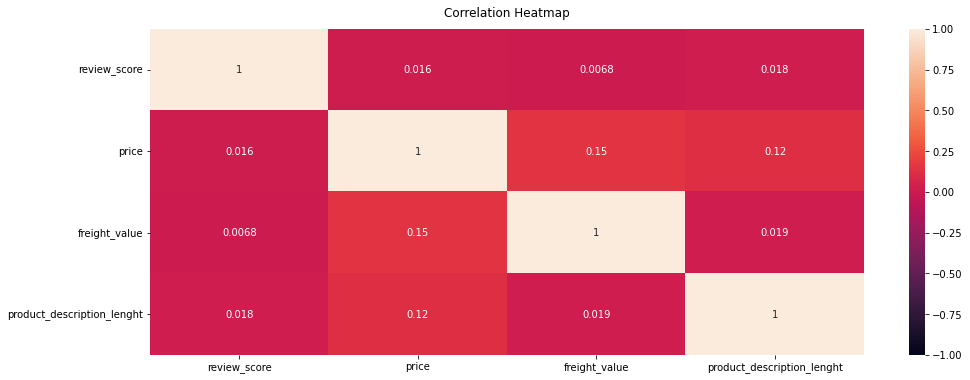

In [36]:
# Correlation HeatMap
calculation = clean_data[['review_score', 'price', 'freight_value', 'product_description_lenght']]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(calculation.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);